In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("JV_MACl_data.csv")

df.columns = ["Voltage_V", "Current density_mAcm-2"]
df.head()

,Voltage_V,Current density_mAcm-2
0,1.21980,-20.440806
1,1.18960,-7.581153
2,1.15940,-0.376364
3,1.12915,6.093381
4,1.09895,9.795769


In [3]:
reverse_scan = df[df["Voltage_V"].diff() < 0]
forward_scan = df[df["Voltage_V"].diff() > 0]

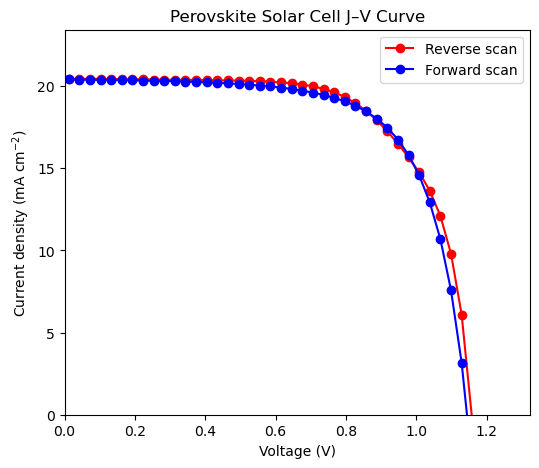

In [4]:
plt.figure(figsize=(6,5))

plt.plot(reverse_scan["Voltage_V"], reverse_scan["Current density_mAcm-2"],
         "r-o", label="Reverse scan")

plt.plot(forward_scan["Voltage_V"], forward_scan["Current density_mAcm-2"],
         "b-o", label="Forward scan")

plt.xlabel("Voltage (V)")
plt.ylabel("Current density (mA cm$^{-2}$)")
plt.title("Perovskite Solar Cell J–V Curve")
plt.xlim(left=0.0)
plt.ylim(bottom=0.0)
plt.grid(False)
plt.legend()
plt.show()

In [5]:
Jsc = np.interp(0, reverse_scan["Voltage_V"],
                reverse_scan["Current density_mAcm-2"])
print("Jsc (mA cm^-2):", Jsc)


Jsc (mA cm^-2): 20.48059935


In [6]:
Voc = np.interp(0, reverse_scan["Current density_mAcm-2"],
                reverse_scan["Voltage_V"])
print("Voc (V):", Voc)

Voc (V): 1.157640255731247


In [7]:
power = reverse_scan["Voltage_V"] * reverse_scan["Current density_mAcm-2"]

Pmax = np.max(power)
Vmp = reverse_scan["Voltage_V"].iloc[np.argmax(power)]
Jmp = reverse_scan["Current density_mAcm-2"].iloc[np.argmax(power)]

FF = Pmax / (Voc * Jsc)
PCE = (Pmax / 100) * 100   # Pin = 100 mW cm^-2

print("Vmp:", Vmp)
print("Jmp:", Jmp)
print("FF:", FF)
print("PCE (%):", PCE)

Vmp: 0.887499988
Jmp: 17.92835018
FF: 0.6711079752463385
PCE (%): 15.911410569609796


In [9]:
V = reverse_scan["Voltage_V"].to_numpy()
J = reverse_scan["Current density_mAcm-2"].to_numpy()

idx = np.argsort(np.abs(V - 0.0))[:8]

a, b = np.polyfit(J[idx], V[idx], 1)
Rsh = a * 1000   # Ω·cm²

print("Rsh (ohm·cm²):", Rsh)
print("Rsh (ohm):", Rsh)

Rsh (ohm·cm²): -6506.525579857468
Rsh (ohm): -6506.525579857468


In [10]:
idx = np.argsort(np.abs(J - 0.0))[:8]

a, b = np.polyfit(J[idx], V[idx], 1)
Rs = a * 1000    # Ω·cm²

print("Rs (ohm·cm²):", Rs)

Rs (ohm·cm²): -8.413513253986707


In [11]:
device_data = pd.DataFrame({
    "Voc_V": [Voc],
    "Jsc_mAcm-2": [Jsc],
    "FF": [FF],
    "PCE_percent": [PCE],
    "Rs_ohm_cm2": [Rs],
    "Rsh_ohm_cm2": [Rsh]
})

device_data

,Voc_V,Jsc_mAcm-2,FF,PCE_percent,Rs_ohm_cm2,Rsh_ohm_cm2
0,1.15764,20.480599,0.671108,15.911411,-8.413513,-6506.52558


In [14]:
device_data.to_csv("perovskite_device_dataset.csv", index=False)


In [15]:
df = pd.read_csv("perovskite_device_dataset.csv")
df

,Voc_V,Jsc_mAcm-2,FF,PCE_percent,Rs_ohm_cm2,Rsh_ohm_cm2
0,1.15764,20.480599,0.671108,15.911411,-8.413513,-6506.52558


In [16]:
X = df[["Voc_V", "Jsc_mAcm-2", "FF"]]   # inputs
y = df["PCE_percent"]                  # output

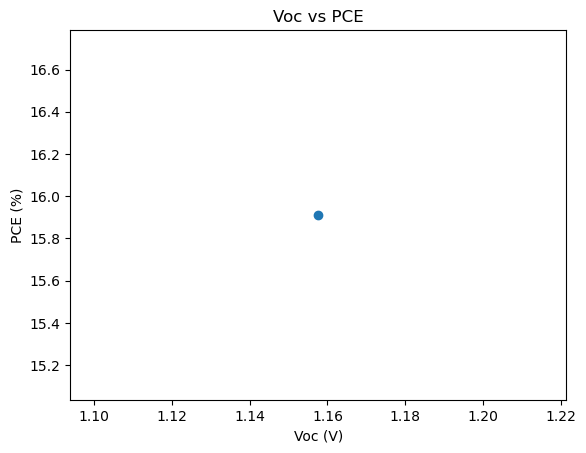

In [17]:
plt.scatter(df["Voc_V"], df["PCE_percent"])
plt.xlabel("Voc (V)")
plt.ylabel("PCE (%)")
plt.title("Voc vs PCE")
plt.grid(False)
plt.show()

In [18]:
device_data

,Voc_V,Jsc_mAcm-2,FF,PCE_percent,Rs_ohm_cm2,Rsh_ohm_cm2
0,1.15764,20.480599,0.671108,15.911411,-8.413513,-6506.52558


In [19]:
df

,Voc_V,Jsc_mAcm-2,FF,PCE_percent,Rs_ohm_cm2,Rsh_ohm_cm2
0,1.15764,20.480599,0.671108,15.911411,-8.413513,-6506.52558


In [20]:
X.shape, y.shape

((1, 3), (1,))